## Convolutional Neural Network

In [1]:
import os 
import sys
sys.path.append('C:/Users/manya/Documents/Ironhack/Course/Final-project/src')
import CNN_model 
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

### Vegetable image Dataset

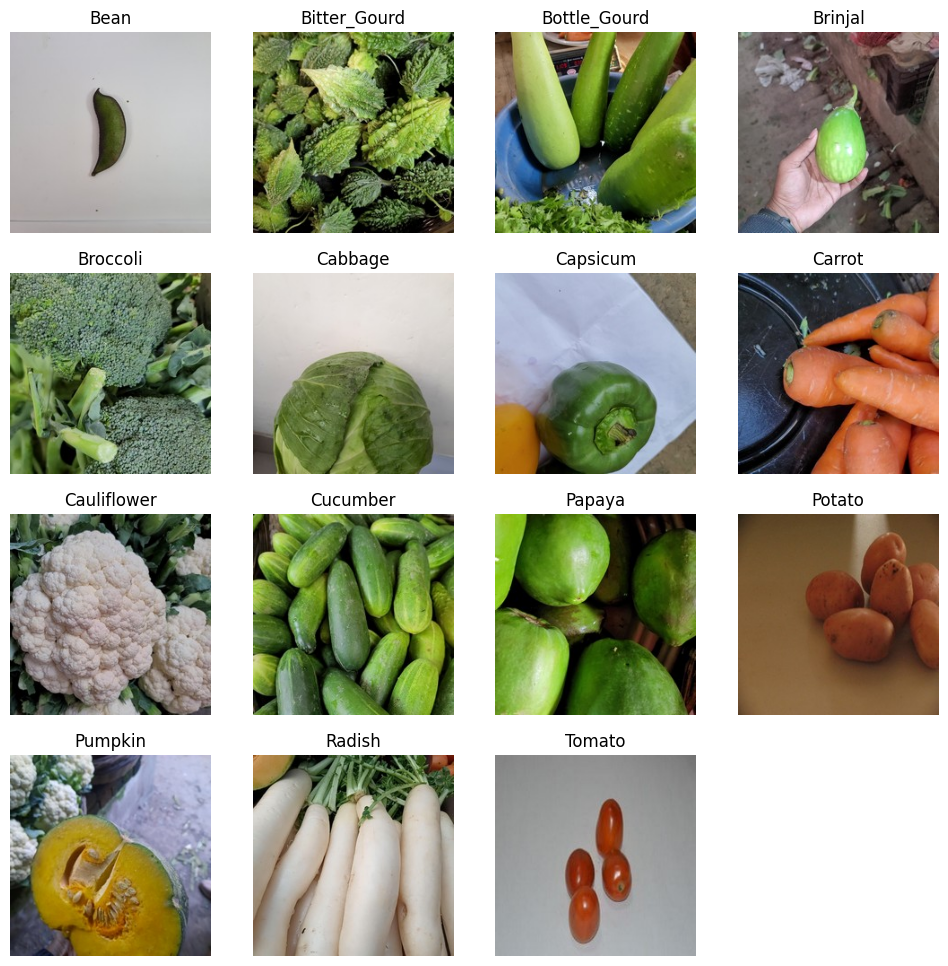

In [2]:
image_categories = os.listdir ('C:/Users/manya/Documents/Ironhack/Course/Final-project/images_15/train') #list of categories
plot_categories = CNN_model.plot_images(image_categories, '../images_15/train')
plot_categories.savefig ('../graphs/model_Categories.png')

### Creating ImageDataGenerator

First is necessary to create the Data Image Generator that serves to provide batches for each set (training, validation and test) since sometimes is not possible to load a large set of images at once. This generator automatically loads the images, pre-processes them and returns the batches of images with their corresponding labels. Moreover, we can also used it for data augmentation.

The parameters of the function 'flow_from_directory':
- Folders paths to train, validation and test 
- Target_size is the desired size (width pixels x height pixels) images will be resized to be all the same.It is worth noting that reducing the size of the images reduces the computational resources required to train the model, but may also result in a loss of information. Thus, the choice of target size depends on the characteristics of the data set and the requirements of the model. In this model, we use the original size 224x224, because iterating through different image size it is the one that works best but takes the longest to train.
- Batch size is the number of images that are processed together in a single forward and backward pass instead of feeding the model with the entire dataset at once. Larger batch sizes will train faster and consume more memory, even though might show lower accuracy. In this model, 32 images will be processed before the model is updated. 

In [3]:
train_data_dir = 'C:/Users/manya/Documents/Ironhack/Course/Final-project/images_15/train'
test_data_dir = 'C:/Users/manya/Documents/Ironhack/Course/Final-project/images_15/test'
validation_data_dir = 'C:/Users/manya/Documents/Ironhack/Course/Final-project/images_15/validation'

In [4]:
train_generator = CNN_model.Image_Data_Generator_train(train_data_dir, (224,224), 32)
validation_generator = CNN_model.Image_Data_Generator_test_val(validation_data_dir, (224,224), 32)
test_generator = CNN_model.Image_Data_Generator_test_val(test_data_dir, (224,224), 32)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


### Model Creation
The model will be created using Keras API. First of all, the model is sequential since the implementation is simple and adequated to the case where the neural network is a sequency of linear layers. Our model is composed of 7 layers: 

- Conv2D_2 layer: This is a convolutional layer with 32 filters and a kernel size of 3x3. It takes the input and applies convolutional operations to it, resulting in an output shape of (None, 222, 222, 32). The layer has 896 trainable parameters.

- MaxPooling2D_2 layer: This is a max pooling layer with a pool size of 2x2. It reduces the spatial dimensions of the input by half. The output shape is (None, 111, 111, 32). This layer doesn't have any trainable parameters since it performs a fixed operation.

- Conv2D_3 layer: This is another convolutional layer with 64 filters and a kernel size of 3x3. It operates on the output of the previous layer, resulting in an output shape of (None, 109, 109, 64). This layer has 18,496 trainable parameters.

- MaxPooling2D_3 layer: Similar to the previous max pooling layer, this layer reduces the spatial dimensions by half. The output shape is (None, 54, 54, 64), and it doesn't have any trainable parameters.

- Flatten_1 layer: This layer flattens the output of the previous layer into a one-dimensional vector. It transforms the input shape from (None, 54, 54, 64) to (None, 186,624). It doesn't introduce any trainable parameters.

- Dense_2 layer: This is a fully connected (dense) layer with 64 units. It takes the flattened input and applies a linear transformation to it, producing an output shape of (None, 64). This layer has 11,944,000 trainable parameters.

- Dense_3 layer: This is the final fully connected layer with 15 units, corresponding to the 15 classes the model is trying to predict. It produces the final output of the network with a shape of (None, 15). This layer has 975 trainable parameters.

Overall, this model consists of two convolutional layers followed by max pooling layers, a flattening layer, and two fully connected layers. The total number of trainable parameters in the model is 11,945,367.

In [5]:
model_def = CNN_model.model_creation((224,224,3),train_generator)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 64)               

### Model Training
First, the model is compiled using three parameters: 
- Optimizer: the optimizer determines how the model is updated based on the calculated gradient during training. Adam optimizer is chosen due to the fact that adapts the learning rate for each parameter based on the average of past gradients, allowing it to converge quickly and handle sparse gradients efficiently.
- Loss: the loss function measures the discrepancy between the predicted outputs of the model and the true values. Categorical cross-entropy is used in multi-classification problems because calculates the average logarithmic loss for each class and minimizes during training
- Metrics:Accuracy is choosen for evaluating the performance of the model because it calcultaes the percentage of correctly predicted samples out of the total number of samples. A higher accuracy values indicates a better performance of the model

Then, the model is trained setting up 32 epochs, which is the total number of iterations of all the training data in one cycle for training. 

In [6]:
history = CNN_model.train_model(model_def, train_generator, validation_generator, 32)

Epoch 1/32
50/50 [==============================] - 50s 994ms/step - loss: 3.2268 - accuracy: 0.1606 - val_loss: 2.1306 - val_accuracy: 0.2327
Epoch 2/32
50/50 [==============================] - 48s 970ms/step - loss: 2.0141 - accuracy: 0.3106 - val_loss: 1.7087 - val_accuracy: 0.4213
Epoch 3/32
50/50 [==============================] - 49s 983ms/step - loss: 1.5446 - accuracy: 0.4812 - val_loss: 1.4110 - val_accuracy: 0.5500
Epoch 4/32
50/50 [==============================] - 49s 986ms/step - loss: 1.2318 - accuracy: 0.5974 - val_loss: 1.2528 - val_accuracy: 0.6087
Epoch 5/32
50/50 [==============================] - 49s 980ms/step - loss: 1.1522 - accuracy: 0.6250 - val_loss: 1.0836 - val_accuracy: 0.6500
Epoch 6/32
50/50 [==============================] - 49s 975ms/step - loss: 1.1204 - accuracy: 0.6369 - val_loss: 1.0419 - val_accuracy: 0.6590
Epoch 7/32
50/50 [==============================] - 49s 980ms/step - loss: 1.0002 - accuracy: 0.6806 - val_loss: 0.9605 - val_accuracy: 0.6947

In [7]:
model_def.save('../models/model_def.h5') #We save the trained model

C:\Users\manya\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
model_def.save('../models/model_def.keras')

### Model Evaluation 

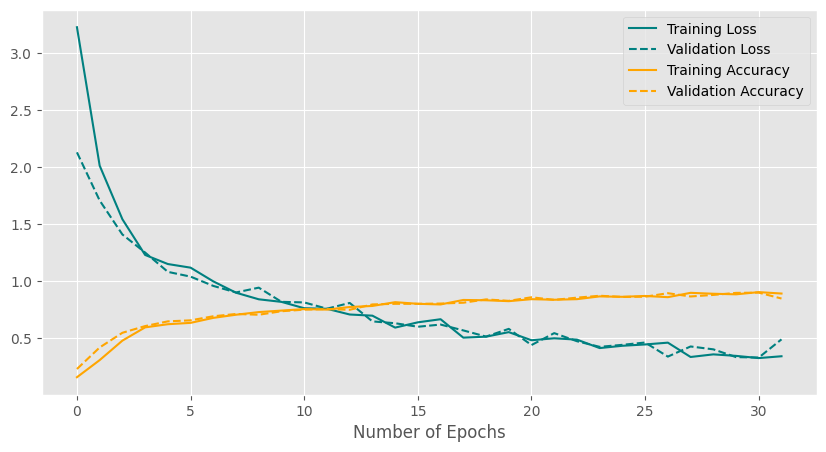

In [9]:
performance_metrics = CNN_model.plot_trainig_metrics(history)
performance_metrics.savefig('../graphs/model_def_performance.png')

In [18]:
history.evaluate(test_generator) #Evaluate the performance of the model using the test dataset

AttributeError: 'History' object has no attribute 'evaluate'

### Model Predictions

In [11]:
predictions = model_def.predict(test_generator) #Predict the classification

94/94 [==============================] - 12s 129ms/step


In [12]:
predictions = model_def.predict(test_generator)


94/94 [==============================] - 11s 121ms/step


In [13]:
predicted_classes = np.argmax(predictions, axis=1)

In [14]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [15]:
confusion_mat = confusion_matrix(true_classes, predicted_classes)

In [16]:
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[10 13 10 17  6 12 16 16 17 12 11 12 29 11  8]
 [10 15  8  8  4 18 22 11 13 12 16 19 19 16  9]
 [20  8 12 15  4 14 12 10 15 15 20 16 15 13 11]
 [ 8 10 17 20  7 13 12  7 14 15  6 16 26 16 13]
 [13 18 14 12  3  7 16 13 11 15 15 21 20 16  6]
 [11 11  7 16  4  8 16 16 20 18 18 20 17 11  7]
 [15 12 19 13  9  8 15 11 12 14  8 19 19 15 11]
 [12  7  9 12  1  8 21 15 12 18 21 15 25 13 11]
 [14 14 10 13 11 10 17  9 14 11 14 10 21 19 13]
 [ 8 16 12 16  3 10 11 15 13 12 17 16 22 16 13]
 [15 11 13 11  7 10 20  8 25 13 13  8 21 12 13]
 [10 14 11 18 14 18 12 11 14 17 17 12 14  9  9]
 [12 11  4 13  5 16 18 13 12 13 20 15 29 11  8]
 [14 11  9 17  5  9 15 12 20 16 10 16 21 15 10]
 [13 10 11 15 10  8 10 20 13 12 15 17 15 17 14]]


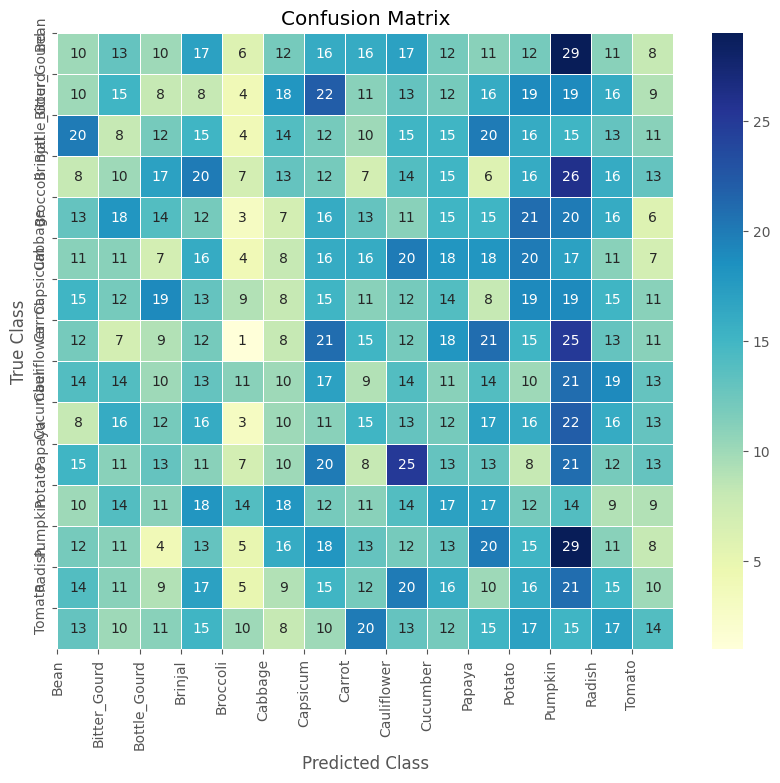

NameError: name 'plt' is not defined

In [17]:
confusion_matrix = CNN_model.conf_matrix(test_generator, predictions)
plt.savefig('../graphs/model_def_confusion_matrix.png')